In [8]:
import pandas as pd

In [1]:
pip install nltk

In [9]:
df = pd.read_csv("maribelajar-translate.csv")
df

,Unnamed: 0,Steming,Text_Inggris
0,0,terimakasih,Thank You
1,1,nyimpan gamenya gimana,how do you save the game?
2,2,save world,save world
3,3,bagus,Good
4,4,subscribe boss terimakasih,subscribe boss thank you
...,...,...,...
142,144,matur terimakasih,thank you very much
143,145,simak kemarin tinggal,stay tuned yesterday
144,146,simak,take a look
145,148,terimakasih,Thank You


In [10]:
df = df.drop(labels="Unnamed: 0", axis=1)
# df = df.drop(labels="sentiment", axis=1)

In [11]:
df.columns

Index(['Steming', 'Text_Inggris'], dtype='object')

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to C:\Users\Laurence
[nltk_data]     Nicholas S\AppData\Roaming\nltk_data...


True

In [16]:
sentiment = SentimentIntensityAnalyzer()
df["Compound"] = [sentiment.polarity_scores(i)["compound"] for i in df["Text_Inggris"]]
df.head()

,Steming,Text_Inggris,Compound
0,terimakasih,Thank You,0.3612
1,nyimpan gamenya gimana,how do you save the game?,0.4939
2,save world,save world,0.4939
3,bagus,Good,0.4404
4,subscribe boss terimakasih,subscribe boss thank you,0.3612


In [22]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append("Positif")
    elif i <= -0.05:
        sentiment.append("Negatif")
    else:
        sentiment.append("Netral")
df["Label"] = sentiment
df.head(100)

,Steming,Text_Inggris,Compound,Label
0,terimakasih,Thank You,0.3612,Positif
1,nyimpan gamenya gimana,how do you save the game?,0.4939,Positif
2,save world,save world,0.4939,Positif
3,bagus,Good,0.4404,Positif
4,subscribe boss terimakasih,subscribe boss thank you,0.3612,Positif
...,...,...,...,...
95,terima kasih bu,thank you mom,0.3612,Positif
96,mantap terimakasih materi,"great, thank you material",0.7650,Positif
97,mantab bu,great ma'am,0.6249,Positif
98,terima kasih bu,thank you mom,0.3612,Positif


In [23]:
df[['Steming','Label']]

,Steming,Label
0,terimakasih,Positif
1,nyimpan gamenya gimana,Positif
2,save world,Positif
3,bagus,Positif
4,subscribe boss terimakasih,Positif
...,...,...
142,matur terimakasih,Positif
143,simak kemarin tinggal,Netral
144,simak,Netral
145,terimakasih,Positif


In [24]:
pd.value_counts(df['Label'])

C:\Users\Laurence Nicholas S\AppData\Local\Temp\ipykernel_17088\626637336.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Label'])


Label
Positif    78
Netral     61
Negatif     8
Name: count, dtype: int64

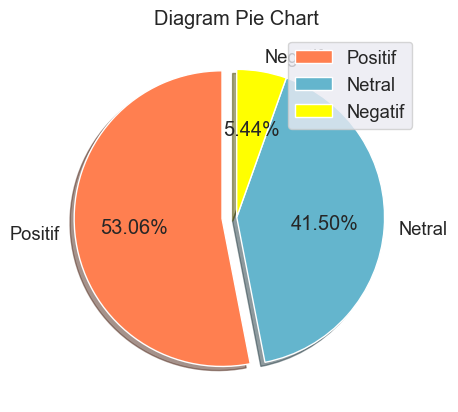

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
#pie chart
labels = ['Positif','Netral','Negatif']
Category2 = [78,61,8]
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [26]:
keep_col = ['Steming','Label']
new_df = df[keep_col]
new_df.to_csv("maribelajar-labeling.csv")